In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

from DataManager import DataManager
from utils.functions import compute_serial_matrix
from utils.plotting import plot_matrix_dendrograms

In [2]:
# Load the datamanager
dm = DataManager()

In [3]:
# Calculate correlation matrix between features
ftr_vals = dm.data.values[:,3:]
pearson_corr_matrix = np.corrcoef(ftr_vals, rowvar=False)

# Ensure symmetry and 1s on diagonal
pearson_corr_matrix = (pearson_corr_matrix + pearson_corr_matrix.T)/2                   
np.fill_diagonal(pearson_corr_matrix, 1)  

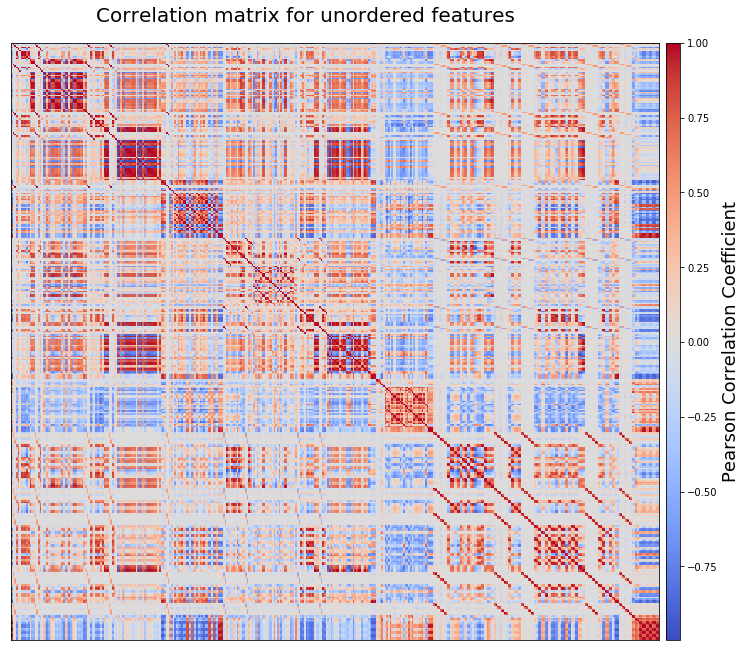

In [4]:
# Display correlation matrix as heatmap
fig = plt.figure(figsize=(10, 10))
plot_matrix_dendrograms(fig, pearson_corr_matrix)
fig.suptitle('Correlation matrix for unordered features', fontsize=20)
fig.show()

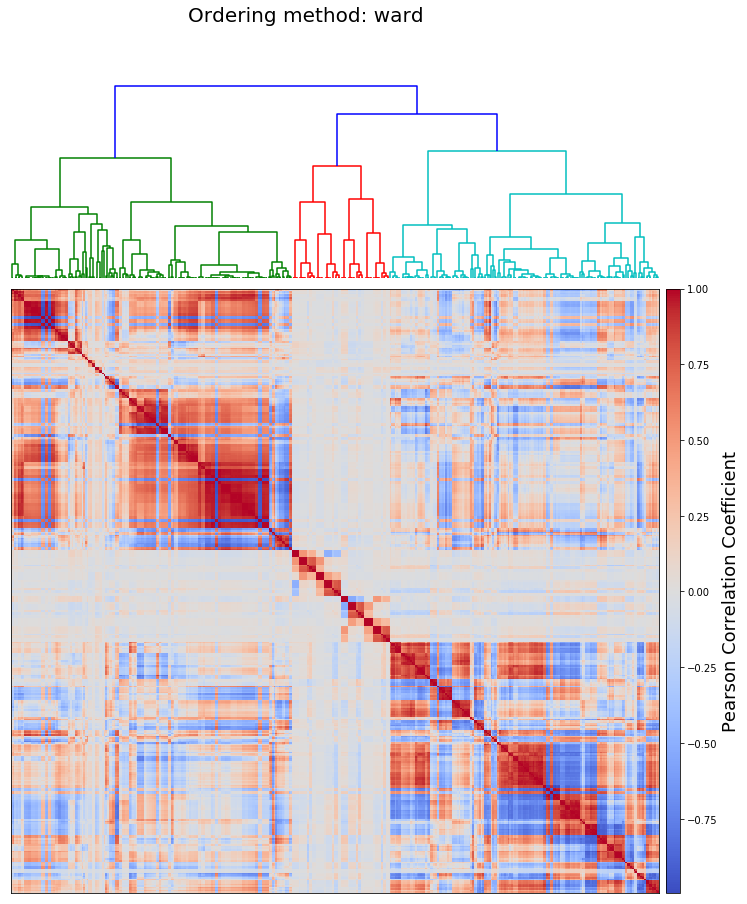

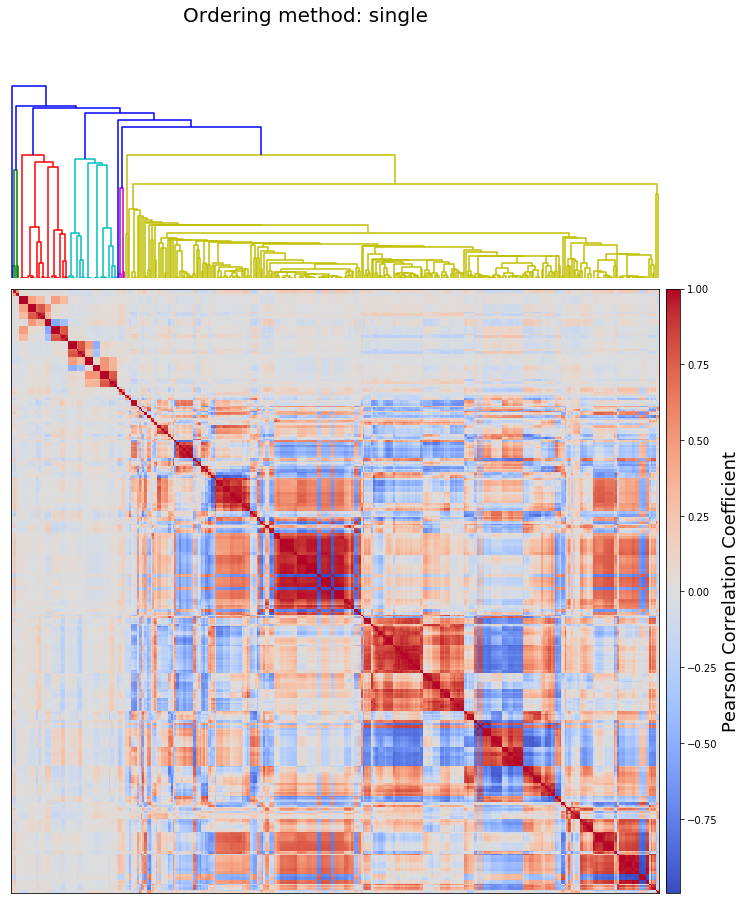

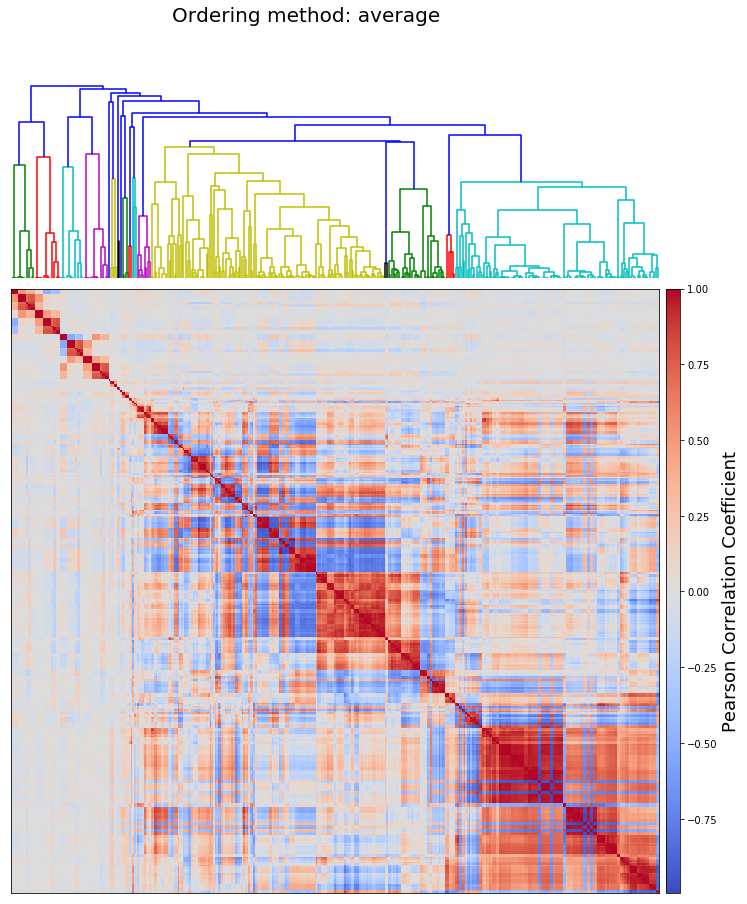

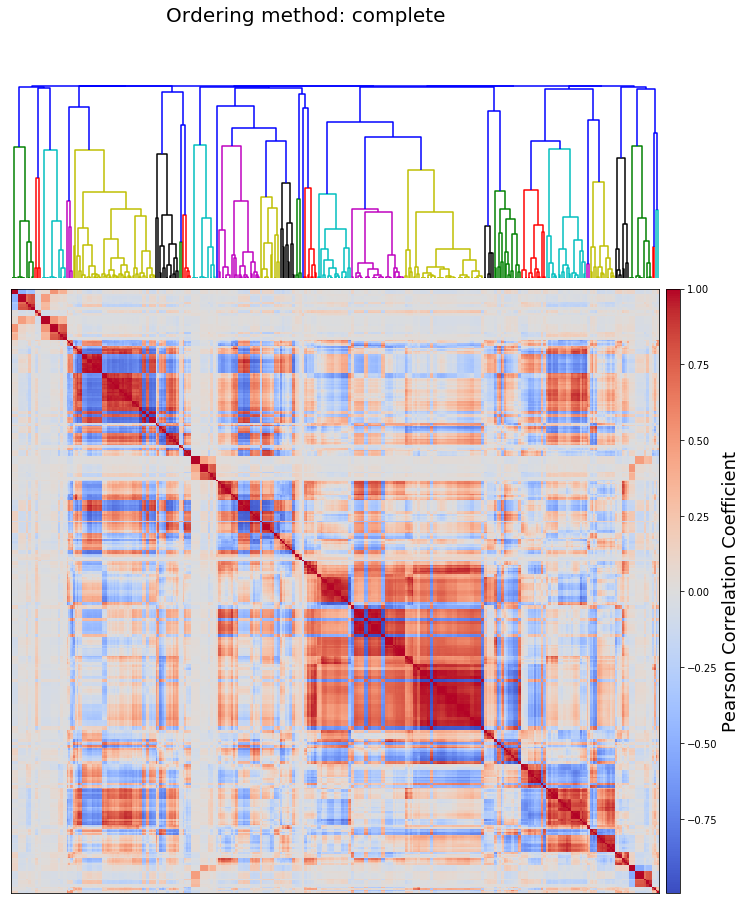

In [5]:
# Explanation of linkage methods https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html
methods = ["ward","single","average","complete"]
dissimilarity = 1 - np.abs(pearson_corr_matrix)
for method in methods:
    ordered_dist_mat, res_order, res_hierarchy = compute_serial_matrix(dissimilarity, method=method)
    ord_pearson_corr_matrix = np.corrcoef(ftr_vals[:,res_order], rowvar=False) 
    
    fig = plt.figure(figsize=(10,14))
    plot_matrix_dendrograms(fig, ord_pearson_corr_matrix, hierarchy_top=res_hierarchy)
    fig.suptitle('Ordering method: {}'.format(method), fontsize=20)
    plt.show()
#     if method == "ward":
#         fig.savefig(os.path.join(dm.output_folder, "hierarchical_clustering.pdf"), bbox_inches='tight')
    print("="*60)
